In [ ]:
url = r'/content/drive/MyDrive/uvas'

In [ ]:
import pathlib
import PIL
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data_dir = pathlib.Path(url)

In [ ]:
len(list(data_dir.glob('*/*.JPG')))

1600

In [ ]:
subfolders = [f.name for f in data_dir.iterdir() if f.is_dir()]

In [ ]:
subfolders

['BlackMeasles', 'LeafBlight', 'BlackRot', 'HealthyGrapes']

In [ ]:
leafblight = list(data_dir.glob('LeafBlight/*'))

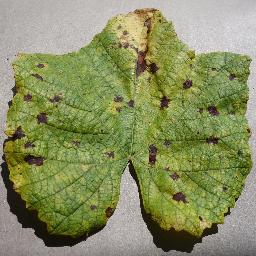

In [ ]:
PIL.Image.open(str(leafblight[0]))

In [ ]:
for subfolder in subfolders:
    path = data_dir / subfolder
    images = list(path.glob('*.JPG'))
    print(f"Classe '{subfolder}' tem {len(images)} imagens.")
    if images:
        img = PIL.Image.open(str(images[0]))
        img_array = np.array(img)
        print(f"Dimensões da primeira imagem em '{subfolder}': {img_array.shape}")


Classe 'BlackMeasles' tem 400 imagens.
Dimensões da primeira imagem em 'BlackMeasles': (256, 256, 3)
Classe 'LeafBlight' tem 400 imagens.
Dimensões da primeira imagem em 'LeafBlight': (256, 256, 3)
Classe 'BlackRot' tem 400 imagens.
Dimensões da primeira imagem em 'BlackRot': (256, 256, 3)
Classe 'HealthyGrapes' tem 400 imagens.
Dimensões da primeira imagem em 'HealthyGrapes': (256, 256, 3)


- Um ponto de partida comum é experimentar com um batch size de 32 ou 64 e ajustar a partir daí baseado no desempenho e na capacidade da sua máquina. Se você observar que o treinamento é muito lento, aumentar o batch size pode ser uma boa ideia. Por outro lado, se você encontrar problemas de memória ou se o modelo não estiver aprendendo bem, pode ser necessário reduzir o batch size.

In [ ]:
batch_size = 64
altura = 256
largura = 256

In [ ]:
treino = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=568,
    image_size=(altura,largura),
    batch_size=batch_size
)

Found 1600 files belonging to 4 classes.
Using 1280 files for training.


In [ ]:
validacao = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=568,
    image_size=(altura,largura),
    batch_size=batch_size
)

Found 1600 files belonging to 4 classes.
Using 320 files for validation.


In [ ]:
treino.class_names

['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight']

In [ ]:
tf.random.set_seed(424242)

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])


### Descrição dos Elementos do Modelo
1. Camada de Entrada (tf.keras.layers.Input)<br>
    A camada de entrada define a forma dos dados que serão alimentados na rede. No nosso caso, estamos trabalhando com imagens de tamanho 256x256 pixels, com 3 canais de cor (RGB). Esta camada não realiza nenhum processamento nos dados, mas apenas informa ao modelo o formato dos dados de entrada.

2. Camada de Reescalonamento (tf.keras.layers.Rescaling)<br>
    As imagens geralmente têm valores presentes em cada posição entre 0 e 255. Para facilitar o processamento e melhorar a performance do modelo, escalamos esses valores para a faixa de 0 a 1. A camada Rescaling divide o valor presente em cada posição por 255.

3. Camada de Achatamento (tf.keras.layers.Flatten)<br>
    A camada Flatten converte a matriz de pixels 2D da imagem em um vetor 1D. Este é um passo necessário para conectar a camada de entrada (que é uma imagem) às camadas densas (fully connected layers) subsequentes. Essencialmente, ela pega a estrutura em grade da imagem e a "achata" em uma única linha de dados.

4. Camada Densa com 128 Neurônios (tf.keras.layers.Dense)<br>
    Esta é uma camada densa, ou totalmente conectada, com 128 neurônios. Cada neurônio recebe entrada de todos os neurônios da camada anterior (neste caso, a camada de Flatten). A função de ativação ReLU (Rectified Linear Unit) ajuda a rede a capturar padrões complexos nos dados.

5. Camada de Saída com 4 Neurônios (tf.keras.layers.Dense)<br>
    A última camada é outra camada densa, mas desta vez com 4 neurônios. Esta camada é a saída da rede e utiliza a função de ativação softmax. A softmax transforma os valores de saída em probabilidades que somam 1, o que é útil para tarefas de classificação onde queremos determinar a probabilidade de cada classe. Neste exemplo, presumimos que estamos classificando as imagens em uma de quatro possíveis categorias.


In [ ]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
epocas =10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step - accuracy: 0.5594 - loss: 8.5960 - val_accuracy: 0.7188 - val_loss: 3.2694
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.6040 - loss: 3.9143 - val_accuracy: 0.7188 - val_loss: 2.0759
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step - accuracy: 0.7642 - loss: 1.6528 - val_accuracy: 0.6781 - val_loss: 2.1564
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - accuracy: 0.7541 - loss: 1.4527 - val_accuracy: 0.7531 - val_loss: 1.9469
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - accuracy: 0.8274 - loss: 1.0647 - val_accuracy: 0.7719 - val_loss: 1.0664
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 242ms/step - accuracy: 0.7949 - loss: 1.0854 - val_accuracy: 0.6969 - val_loss: 1.9928
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - accuracy: 0.7262 - loss: 1.6013 - val_accuracy: 0.7219 - val_loss: 1.5063
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 272ms/step - accuracy: 0.7796 - loss: 1.1968 - val_accuracy: 0.

In [ ]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 196608)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      25,165,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,499,406 (288.01 MB)

 Trainable params: 25,166,468 (96.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,332,938 (192.00 MB)

In [ ]:
def plota_resultados(history,epocas):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  intervalo_epocas = range(epocas)
  intervalo_epocas = range(epocas)
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(intervalo_epocas, acc, label='Acurácia do Treino')
  plt.plot(intervalo_epocas, val_acc, label='Acurácia da Validação')
  plt.legend(loc='lower right')


  plt.subplot(1, 2, 2)
  plt.plot(intervalo_epocas, loss, label='Custo do Treino')
  plt.plot(intervalo_epocas, val_loss, label='Custo da Validação')
  plt.legend(loc='upper right')
  plt.show()

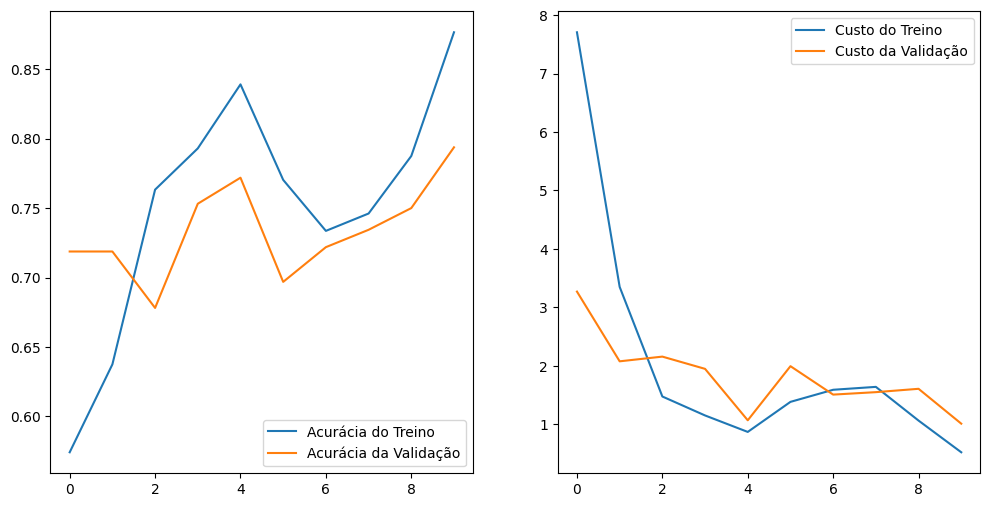

In [ ]:

plota_resultados(history,epocas)

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    tf.keras.layers.Rescaling(1./255),
    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [ ]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epocas = 10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas
)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 310ms/step - accuracy: 0.2714 - loss: 5.3136 - val_accuracy: 0.2594 - val_loss: 1.2847
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 256ms/step - accuracy: 0.3038 - loss: 1.2121 - val_accuracy: 0.6375 - val_loss: 0.9793
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - accuracy: 0.7297 - loss: 0.6917 - val_accuracy: 0.8250 - val_loss: 0.4118
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 220ms/step - accuracy: 0.9309 - loss: 0.2311 - val_accuracy: 0.8625 - val_loss: 0.3051
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 262ms/step - accuracy: 0.9774 - loss: 0.1044 - val_accuracy: 0.9187 - val_loss: 0.2141
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 218ms/step - accuracy: 0.9896 - loss: 0.0507 - val_accuracy: 0.9344 - val_loss: 0.1785
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 278ms/step - accuracy: 0.9963 - loss: 0.0194 - val_accuracy: 0.9062 - val_loss: 0.2428
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 241ms/step - accuracy: 0.9977 - loss: 0.0208 - val_accuracy: 

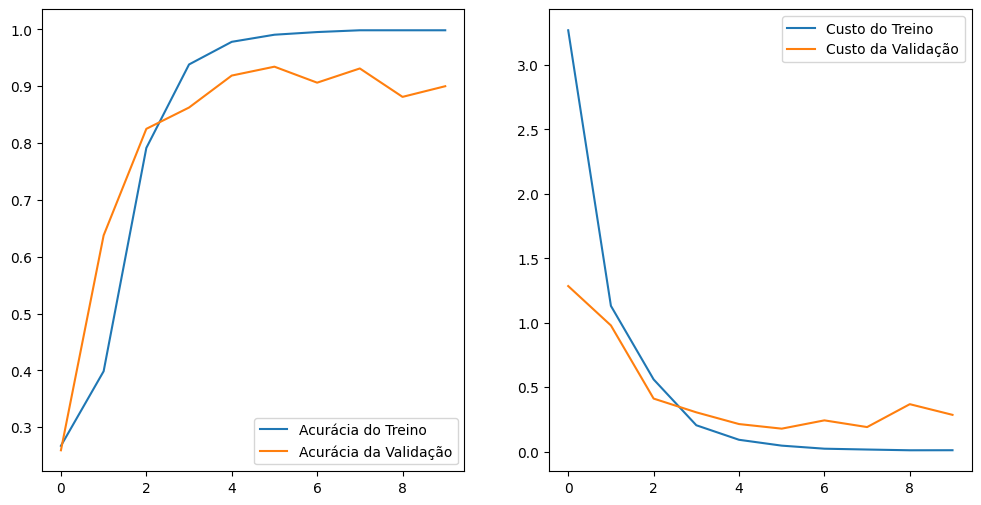

In [ ]:
plota_resultados(history, epocas)

In [ ]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      15,745,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,267,438 (180.31 MB)

 Trainable params: 15,755,812 (60.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,511,626 (120.21 MB)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.93):
      print("\n Alcançamos 93% de acurácia. Parando o treinamento!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    tf.keras.layers.Rescaling(1./255),
    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
epocas =10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,
    callbacks=[callbacks]
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 230ms/step - accuracy: 0.3181 - loss: 5.4262 - val_accuracy: 0.7188 - val_loss: 0.8596
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 266ms/step - accuracy: 0.6703 - loss: 0.7873 - val_accuracy: 0.8313 - val_loss: 0.4969
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - accuracy: 0.8209 - loss: 0.4305 - val_accuracy: 0.9125 - val_loss: 0.2756
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 282ms/step - accuracy: 0.8847 - loss: 0.3060 - val_accuracy: 0.9406 - val_loss: 0.2254
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.9434 - loss: 0.1739
 Alcançamos 93% de acurácia. Parando o treinamento!
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 257ms/step - accuracy: 0.9438 - loss: 0.1730 - val_accuracy: 0.9125 - val_loss: 0.2493


In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.05),
  ]
)


In [ ]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    # Add convolutions and max pooling
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
epocas = 50

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - accuracy: 0.3089 - loss: 4.8356 - val_accuracy: 0.4375 - val_loss: 1.2363
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 0.5547 - loss: 0.9667 - val_accuracy: 0.6656 - val_loss: 0.7638
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 293ms/step - accuracy: 0.7894 - loss: 0.6377 - val_accuracy: 0.5938 - val_loss: 1.3943
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 262ms/step - accuracy: 0.8221 - loss: 0.5118 - val_accuracy: 0.6687 - val_loss: 1.3268
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 253ms/step - accuracy: 0.8931 - loss: 0.3075 - val_accuracy: 0.7594 - val_loss: 0.9086
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step - accuracy: 0.9213 - loss: 0.2271 - val_accuracy: 0.8000 - val_loss: 0.9414
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 278ms/step - accuracy: 0.9134 - loss: 0.2130 - val_accuracy: 0.7625 - val_loss: 1.0037
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 227ms/step - accuracy: 0.9239 - loss: 0.1863 - val_accuracy: 

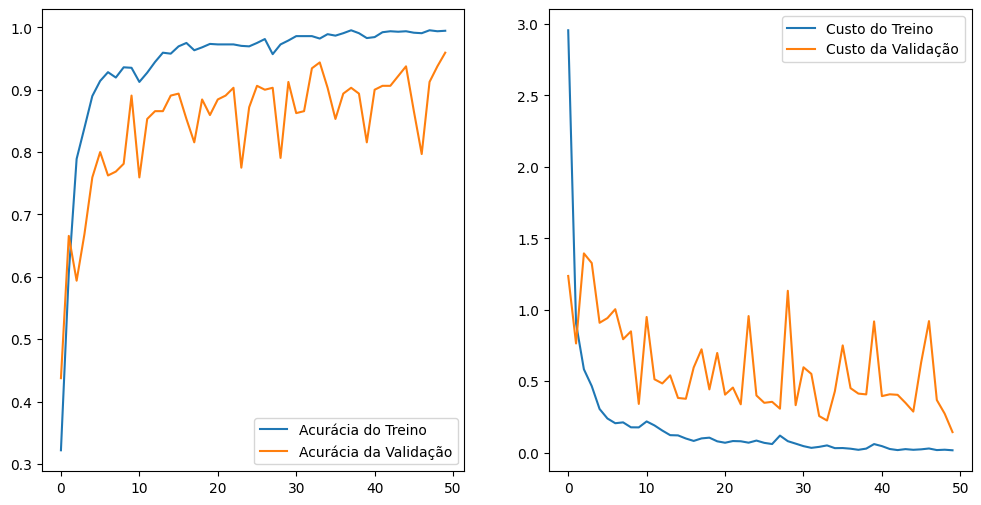

In [ ]:
plota_resultados(history, epocas)


In [ ]:
# Salvar o modelo
modelo.save('modelo_apos_aumento.h5')


In [ ]:
input_shape =(256, 256, 3)

In [ ]:
modelo_base = tf.keras.applications.InceptionV3(input_shape=input_shape,include_top=False,weights='imagenet')

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
modelo_base.trainable = False

In [ ]:
modelo_base.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_100 (Conv2D)       │ (None, 127, 127, 32)   │            864 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_94    │ (None, 127, 127, 32)   │             96 │ conv2d_100[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, 127, 127, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_101 (Conv2D)       │ (None, 125, 125, 32)   │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_95    │ (None, 125, 125, 32)   │             96 │ conv2d_101[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, 125, 125, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_102 (Conv2D)       │ (None, 125, 125, 64)   │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_96    │ (None, 125, 125, 64)   │            192 │ conv2d_102[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, 125, 125, 64)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_10          │ (None, 62, 62, 64)     │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_103 (Conv2D)       │ (None, 62, 62, 80)     │          5,120 │ max_pooling2d_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_97    │ (None, 62, 62, 80)     │            240 │ conv2d_103[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, 62, 62, 80)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_104 (Conv2D)  

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
rescale = tf.keras.layers.Rescaling(1./255)
treino = treino.map(lambda x, y: (rescale(x), y))
validacao = validacao.map(lambda x, y: (rescale(x), y))


In [ ]:
ultima_camada = modelo_base.get_layer('mixed7')

In [ ]:
ultima_saida = ultima_camada.output

In [ ]:
x = tf.keras.layers.Flatten()(ultima_saida)

x = tf.keras.layers.Dense(1024, activation='relu')(x)

x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(4, activation='softmax')(x)
modelo = tf.keras.Model(inputs=modelo_base.input,outputs=x)


In [ ]:
modelo.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_100 (Conv2D)       │ (None, 127, 127, 32)   │            864 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_94    │ (None, 127, 127, 32)   │             96 │ conv2d_100[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, 127, 127, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_101 (Conv2D)       │ (None, 125, 125, 32)   │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_95    │ (None, 125, 125, 32)   │             96 │ conv2d_101[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, 125, 125, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_102 (Conv2D)       │ (None, 125, 125, 64)   │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_96    │ (None, 125, 125, 64)   │            192 │ conv2d_102[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, 125, 125, 64)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_10          │ (None, 62, 62, 64)     │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_103 (Conv2D)       │ (None, 62, 62, 80)     │          5,120 │ max_pooling2d_10[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_97    │ (None, 62, 62, 80)     │            240 │ conv2d_103[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, 62, 62, 80)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_104 (Conv2D)  

 Total params: 163,121,060 (622.26 MB)

 Trainable params: 154,145,796 (588.02 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [ ]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
                    loss = 'sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
epocas =20

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,
)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 30s 518ms/step - accuracy: 0.5111 - loss: 15.3068 - val_accuracy: 0.8938 - val_loss: 0.9501
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step - accuracy: 0.9382 - loss: 0.6002 - val_accuracy: 0.9719 - val_loss: 0.2272
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 252ms/step - accuracy: 0.9887 - loss: 0.0498 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 348ms/step - accuracy: 0.9976 - loss: 0.0122 - val_accuracy: 0.9969 - val_loss: 0.0089
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 249ms/step - accuracy: 0.9962 - loss: 0.0311 - val_accuracy: 0.9969 - val_loss: 0.0150
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 328ms/step - accuracy: 0.9957 - loss: 0.0172 - val_accuracy: 0.9937 - val_loss: 0.0187
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 244ms/step - accuracy: 0.9978 - loss: 0.0166 - val_accuracy: 0.9719 - val_loss: 0.2355
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 287ms/step - accuracy: 0.9988 - loss: 0.0026 - val_accuracy: 

In [ ]:
historico = modelo.fit(treino, epochs=20, validation_data=validacao)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 320ms/step - accuracy: 1.0000 - loss: 4.5435e-07 - val_accuracy: 0.9844 - val_loss: 0.1320
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 264ms/step - accuracy: 1.0000 - loss: 7.1505e-05 - val_accuracy: 0.9844 - val_loss: 0.1236
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 304ms/step - accuracy: 1.0000 - loss: 5.0840e-08 - val_accuracy: 0.9844 - val_loss: 0.1223
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 263ms/step - accuracy: 1.0000 - loss: 2.1364e-06 - val_accuracy: 0.9844 - val_loss: 0.1219
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 310ms/step - accuracy: 1.0000 - loss: 9.3277e-07 - val_accuracy: 0.9844 - val_loss: 0.1218
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 261ms/step - accuracy: 1.0000 - loss: 1.3246e-05 - val_accuracy: 0.9844 - val_loss: 0.1215
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - accuracy: 0.9977 - loss: 0.0032 - val_accuracy: 0.9875 - val_loss: 0.0726
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 283ms/step - accuracy: 1.0000 - loss:

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(modelo)


In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]

In [ ]:
modelo_tflite_quantizado = converter.convert()


Saved artifact at '/tmp/tmpaii6y12o'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_350')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  133908854447888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133908854450384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133908854450960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133908854451152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133908854452496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133908854451344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133908854452880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133908854453072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133908854454032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133908854450576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1339088544

In [ ]:
with open('modelo_quantizado16bits.tflite', 'wb') as f:
    f.write(modelo_tflite_quantizado)
